



## **Introduction** 

The purpose of this assignment is to build a machine learning model which can accurately predict the genre of a song using data taken from Spotify. This requires the creation of a classifier which will predict which genre category a particular instance falls into subsequent to training. There are 13 features which may be useful for the model to identify patterns and make accurate predictions. Model performance will be assessed by the accuracy score received when submitted to Kaggle for testing.

In [ ]:
#We import the data using pandas
#import NumPy for mathematical operations
#matplotlib and seaborn for visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_train1=pd.read_csv('CS98XClassificationTrain.csv')

## **Data exploration**

Initially we spent some time exploring the data. Having a good understanding of the dataset is essential prior to attempting to build models or run analyses. 

At this stage we are looking at the range and spread of the features. This is most easily done using visualisations which helped us identify if any of the feature's data was unbalanced, and to identify the presence of outliers. The graphs demonstrate that there is not a huge issue with unbalanced data, but certain features appear skewed (e.g. acous). This will be addressed during feature selection. 

We identified a small number of missing values which were removed. We chose to remove them rather than insert a mean or median value as the small number (15) would not impact the dataset greatly. We also removed some genre categories (those appearing less than five times) from the target feature as their inclusion impairs the performance of the model.

In [ ]:
data_train1.shape

(453, 15)

In [ ]:
data_train1.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


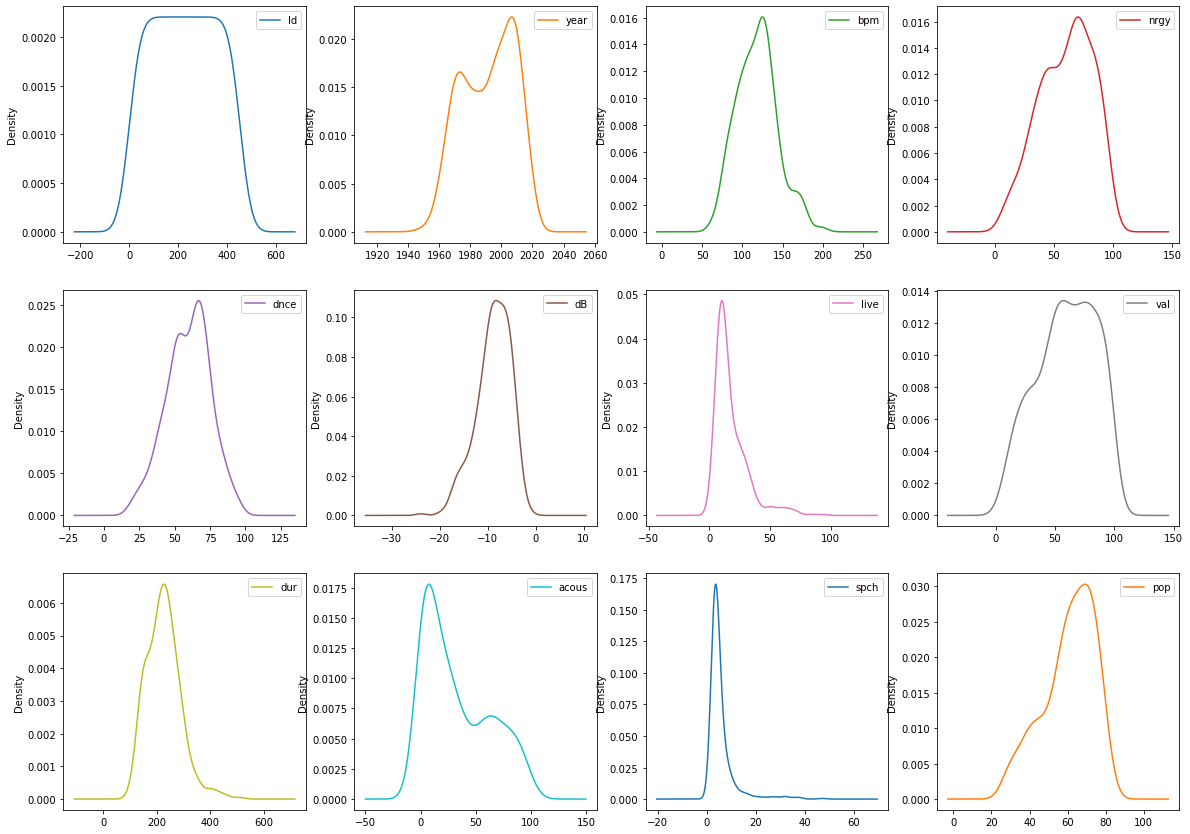

<Figure size 432x288 with 0 Axes>

In [ ]:
#Exploring the distrubution of the features
data_train1.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (20, 20));
plt.show()
plt.tight_layout()

In [ ]:
#Drop missing values
data_train=data_train1.dropna()

In [ ]:
#We remove some of the less frequent genres
#>5 was found to achieve the best accuracy on training data

data_train=data_train.groupby('top genre').filter(lambda x : len(x)>5)

## Encoding categorical data

As certain machine learning techniques prefer numeric data over categorical data, the feature “artist” has been recoded. In order to avoid a situation where the model detects an ordered relationship between the recoded numeric data that is not present, we employed the one-hot encoding technique which alleviates the risk of this by creating a binary output instead. One-hot encoding prevents the model from placing higher importance on higher numbers, and for this reason it was also carried out on the feature “year”.

The variables "topar" and "topyr" encode the artist and year variables respectively. These values are used further in this code to apply it to the separate test dataset to ensure the data remains the same shape. 

In [ ]:
#convert year to a string for one-hot encoding
data_train['year']=data_train['year'].astype('str')

In [ ]:
#Function created that adds one-hot encoded columns to the original dataframe
def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(df[variable]==label,1,0)

In [ ]:
data_train.artist.value_counts().sort_values(ascending=False)

In [ ]:
data_train.year.value_counts().sort_values(ascending=False).head(20)

In [ ]:
#Keep all the artists as after testing we see reducing artists reduces accuracy
topar = [y for y in data_train.artist.value_counts().sort_values(ascending=False).head(400).index]


In [ ]:
#Keep only top 25 years as we see from testing that anything more than that reduces accuracy
topyr=[y for y in data_train['year'].value_counts().sort_values(ascending=False).head(25).index]
topyr

In [ ]:
import warnings
warnings.filterwarnings('ignore')
one_hot_top_x(data_train,'artist',topar)

In [ ]:
warnings.filterwarnings('ignore')
one_hot_top_x(data_train,'year',topyr)

In [ ]:
data_train

## Feature scaling

From exploring the continuous features, we see that the numeric values vary in scale. While random forest and decision tree classifiers do not require scaled features, other machine learning algorithms, for example, support vector machines (SVM), do not perform well when data has not been scaled uniformly. Feature scaling can help address bias and improve the accuracy of machine learning models. 

MinMaxScaler normalises the data to a range between 0 and 1, or, between -1 and 1 here as there are negative values. MinMax scaling does not alleviate the impact of outliers, however, in this instance the outliers have been found to represent patterns that were important for prediction accuracy. Ultimately, MinMaxScaler was chosen as is does not change the shape of the data, the features’ scales are not immensely different, and it performed with greater accuracy than the StandardScaler when tested.

In [ ]:
#Import scalers and  some Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [ ]:
#We see min max scaling improves accuracy the most
data_train[['nrgy','dnce','dB','live','val','pop','dur','bpm','spch','acous']]=mms.fit_transform(data_train[['nrgy','dnce','dB','live','val','pop','dur','bpm','spch','acous']])

<AxesSubplot:>

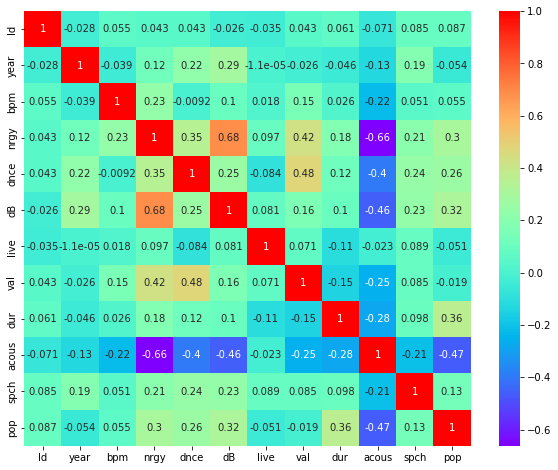

In [ ]:
#Producd a correlation heatmat to aid with feature selection
plt.figure(figsize=(10,8))
sns.heatmap(data_train1.corr(), cmap="rainbow", annot=True)

In [ ]:
data_train=data_train.drop(columns=['Id','title','artist','year'])

In [ ]:
data_train=data_train.dropna()

In [ ]:
#From the correlation matrix and testing
#we see we need to drop the 'acous' column
data_train=data_train.drop(columns=['acous'])

In [ ]:
X=data_train.drop(columns=['top genre'])
y=pd.Series(data_train['top genre'])

In [ ]:
y=pd.DataFrame(y)

In [ ]:
y['top genre']

## Splitting the data 

In order to begin testing models, the data has been divided into a training set and testing set. This allows us to investigate the accuracy of the models we are building prior to making predictions on the submission data.

In [ ]:
#Create a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [ ]:
X_train

In [ ]:
y_train.value_counts()

## Data analyses

Our approach to identifying the best model involved trying a number of supervised training techniques to identify a baseline level of accuracy. Ultimately it was found that keeping as much information as possible, while removing NAs, produced the best accuracy scores. From this, hyperparameters were tuned to improve the accuracy score where possible. 

Once this was completed, a select number of these models were included as part of an ensemble learning model; having identified the best hyperparameter configuration. This unifying of optimised models is what led to using a voting classifier to produce a high accuracy score of 0.75. The models used are explored in the following section.

### **Logistic regression** 

Initially a logistic regression model was created and tested using cross validation. Appropriate packages were imported from sklearn to implement the model. The model was fit to the training data and predictions were formed with results presented in a confusion matrix giving an accuracy score of 0.67. 

Cross validation involves the training data being split into a number of folds (in this case 10) which are used for training the model successively, with a different fold being used for testing each time. It aims to address underfitting and overfitting and tests how well the model can generalise to new data. Our mean score for the analysis (0.58) was slightly lower than with the test train split, suggesting that model was overfitting.

In [ ]:
#Logistic Regression model tested using cross validation technique
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')
lm=LogisticRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
confusion_matrix(y_pred,y_test)
accuracy_score(y_pred,y_test)

0.671875

In [ ]:
#cross_validate
cv_scores = cross_val_score(lm, X_train, y_train, cv=10)
cv_scores_mean = np.mean(cv_scores)
print(cv_scores , "\n\n""mean =" ,"{:.2f}".format(cv_scores_mean))
warnings.filterwarnings('ignore')

[0.73076923 0.5        0.61538462 0.6        0.6        0.52
 0.68       0.4        0.48       0.64      ] 

mean = 0.58


### Stochastic gradient descent (SGD) classifier

The SGDClassifier is a linear classifier (e.g. SVM), which is then optimised by SGD. The process aims to select the optimum parameter values for a model that will minimise the cost function. SGD does this by selecting a random instance for each optimisation trial and calculates the gradients based on this.The default hyperparameter for loss (hinge) has been used here, meaning the algorithm will run a linear SVM model optimised by SGD.

In [ ]:
#Trying an stochastic gradient descent Classifier
warnings.filterwarnings('ignore')
ad=SGDClassifier()
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
accuracy_score(y_test,y_pred)

0.625

### Support vector machine classifier (with GridSearchCV)

Support vector machines (SVM) are powerful machine learning models which often outperform other models. Because of this, we tested the performance of SVM on this data. Dataset size can be a constraint of using SVMs when there are large amounts of data, however, this was not an issue here. SVC is a class of SVM in sklearn and is useful for multiclassification tasks working using a one-vs-one system (one class versus every other class, individually).

SVM makes classification decisions by trying to maximise the distance between categories that have been identified. The C value controls the cost of misclassification. A large C value means there is a higher cost for misclassification, the margin between classes will be small, and it is less likely that categories will be misclassified. A large C value can result in overfitting.

The gamma value refers to the radius of similarity for each instance. A large gamma value means only points that are very close together will be classed together. This can also result in overfitting. 

RBF kernels involve transforming the data to include a higher dimension of data points making them easier to separate and classify. 

**GridSearchCV** is a technique used with machine learning models for selecting the optimal values for defined hyperparameters. This will run through each instance outlined in the code below and suggest values which should generate the most accurate results.

In [ ]:
#Gridsearch shows us  C=100,gamma=0.01 and an 'rbf kernel'
#Yields the best results
# defining parameter range
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)
accuracy_score(y_pred,y_test)

### Naive-Bayes

Naïve-Bayes classifier is a model that is considered to make good predictions even when the training data is quite small, hence its inclusion in our testing. It ignores correlation between features and considers them as independently contributing to the probability of an instance falling into a particular class.

In [ ]:
#Naive-Bayes
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
nbModel_grid=GaussianNB()
nbModel_grid.fit(X_train, y_train)
y_predg=nbModel_grid.predict(X_test)
accuracy_score(y_predg,y_test)

0.609375

### Decision trees

Decision tree learning is used when a specific label or class is required to be identified from a number of possible instances. It works by identifying the most important attributes within a dataset and aims to split classes, or branches, based on those attribute values. Decision tree algorithms will look for the point at which this size becomes the reducing characteristic and splits the classes based on the values. From that point, it will look for the next important attribute to split classes. This will continue until it reaches its maximum specified depth.

It was chosen as a potential model as each of the node splits are easy to interpret. They also frequently form the basis of a number of other supervised learners such as gradient boosting or random forest, therefore acts as a good baseline to assess any improvements over other classifiers.

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.390625

### Gradient boosting

Boosting is a form of linear regression in which the algorithm takes the outputs of a weak learner and feeds it as a weighted sum to correct for the incorrect instances. The weak learners are tweaked for instances of misclassification which enable the convergence of a stronger learner.

The case of gradient boosting uses a decision tree as the weak learner to correct for the poor classifications. This approach was selected as it may be better for datasets in which there are many instances in which only occur once or twice.

In [ ]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

clfgrad = GradientBoostingClassifier()
clfgrad.fit(X_train,y_train)
y_pred=clfgrad.predict(X_test)
accuracy_score(y_test,y_pred)

0.6875

### Ensembler learner with a voting classifier

One of the biggest challenges of this dataset is being able to create a suitable model with a fairly limited sized dataset. To overcome this, ensemble classifiers can be used to offer a collaborative approach between different ML classifiers or multiple comparative iterations of the same approach. Using models whose techniques vary greatly tends to yield the most powerful result, hence our selection.

#### Voting Classifier

Our successful approach utilised a voting classifier which uses multiple different models to each calculate their predicted classes and then aggregates the findings of each base estimator. The voting classifier used hard voting which bases its decision on a majority vote between each of the models for a given class. This is opposed to soft voting which predicts a probability.
The successful voting classifier used a combination of SVC, NB, SGD and Gradboost to generate a score of 0.75.

In [ ]:
#We now use a voting classifier to make an ensemble
#We see the best combination is SVC,Naive-Bayes,SGDClassifier and Gradient boosting
#This is due to the variety of the multiple classifiers
from sklearn.ensemble import VotingClassifier
# group / ensemble of models
estimator = []
estimator.append(('LR', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('SVC', SVC(gamma =0.01, probability = True,C=100,kernel='rbf')))
estimator.append(('NB', nbModel_grid))
estimator.append(('SGD', ad))
estimator.append(('Gradboost', clfgrad))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.75

## Results on training data

Overall we get a top accuracy of 0.75-0.80 on the training set with the voting classifier combination. 




## Conclusions

Overall, after executing tests using a range of machine learning models, we found that the voting classifier ensemble performed with highest accuracy.

We found that one-hot encoding instead of label encoding the artist column helped the accuracy greatly. 

Treating 'year' as a categorical variable and one-hot encoding once again was also very beneficial. Label Encoding was not suitable due to the nominal nature of the categorical data.


**What would we do differently in the future?**

The main issue we had was the lack of training data. This resulted in the model not generalising well to the unseen test data. Also using skills gained later in the course, we could find a way to utilise the 'title' column as it seems of use if used correctly. Having extra features, such as, the lyrics of each song would also greatly aid our model performance.